/home/ubuntu/anaconda3/envs/banditnet/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/anaconda3/envs/banditnet/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/ubuntu/anaconda3/envs/banditnet/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/envs/banditnet/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/anaconda3/envs/banditnet/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(

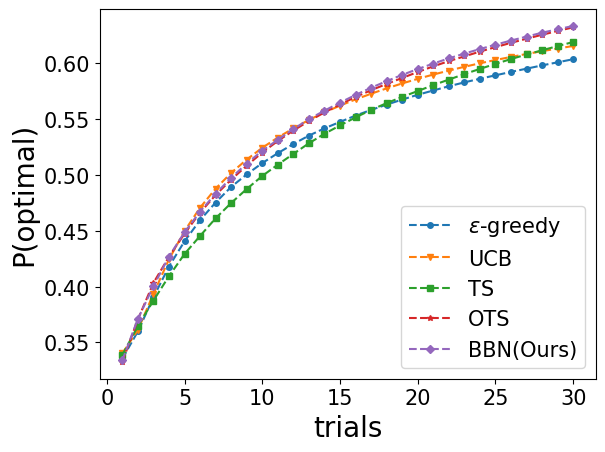

In [18]:
# @Start date : 2023/5/11
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
plt.style.use('default')
if __name__ == '__main__':

    dim = 3

    ucb_bonus = 0.25
    mean_std = 1
    sample_number = 1
    std_list = [3,1,0.5]
    path_list = [ f'saved/greedy_3D_{std_list}.csv', f'saved/UCB_2D_{ucb_bonus}_{std_list}.csv',f'saved/TS_2D_{std_list}.csv', f'saved/OTS_{std_list}.csv',f'saved/bandit_performance_analysed_data_{std_list}.csv']


    name_list = ['$\epsilon$-greedy','UCB','TS', 'OTS','BBN(Ours)']
    total_trial = 30
    num_optimal = 0
    choice_optimal = 0
    markers = ['o', 'v', 's', '*', 'D']
    Std_trial = []
    # for (id,path) in enumerate(path_list):
    #     Data = pd.read_csv(path)
    #     # Data = Data[abs(Data['mu1'] - Data['mu2']) < 1]
    #     P_tiral = []
    #     P_tiral_total = []
    #     all = 0
    #     for trial in range(1,total_trial+1,1):
    #         p_list = []
    #         Data_trial = Data[Data['trial']==trial]
    #         Data_trial_optimal =  len(Data_trial[(Data_trial['optimal'] == True)])
    #         P_tiral.append(Data_trial_optimal / len(Data_trial))
    #         all += Data_trial_optimal
    #         P_tiral_total.append(all / len(Data_trial)*trial)
    #         Std_trial.append(np.std(p_list))
    # 
    #     plt.errorbar(np.arange(1,total_trial+1,1),P_tiral,label=name_list[id],linestyle='--',marker='.')
    # plt.xlabel('trials')
    # plt.ylabel('P(optimal)')
    # x_major_locator = MultipleLocator(5)
    # ax = plt.gca()
    # # 设置x轴的间隔
    # ax.xaxis.set_major_locator(x_major_locator)
    # plt.legend(prop={'size': 15})
    # plt.title(f"{dim}_D {std_list} per trial")
    # plt.show()


    for (id,path) in enumerate(path_list):
        Data = pd.read_csv(path)
        # Data = Data[abs(Data['mu1'] - Data['mu2']) < 1]
        P_tiral = []
        P_tiral_total = []
        all = 0
        for trial in range(1,total_trial+1,1):
            p_list = []
            Data_trial = Data[Data['trial']==trial]
            Data_trial_optimal = len(Data_trial[(Data_trial['optimal'] == True)])
            P_tiral.append(Data_trial_optimal / len(Data_trial))
            all += Data_trial_optimal
            P_tiral_total.append(all / (len(Data_trial)*trial))
            Std_trial.append(np.std(p_list))
            if trial == 100:
                print(all / (len(Data_trial)*trial))
        plt.errorbar(np.arange(1,total_trial+1,1),P_tiral_total,label=name_list[id],linestyle='--',marker=markers[id],markersize=4)
    plt.xlabel('trials',size=20)
    plt.ylabel('P(optimal)',size=20)
    x_major_locator = MultipleLocator(5)
    ax = plt.gca()
    plt.xticks(size=15)
    plt.yticks(size=15)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.legend(prop={'size': 15})
    plt.show()
